# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pylab as plt
import seaborn as sns
import datetime
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests as req
from bs4 import BeautifulSoup as bs

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
# your answer here
temp = pd.read_csv('Temp_States.csv', sep=',')

#### Print `temp`

In [7]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [8]:
# your answer here
temp.info(memory_usage='deep')
#we have two object columns and one float column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 1.1 KB


#### Select the rows where state is New York

In [12]:
# your answer here
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [13]:
# your answer here
temp.loc[temp['State'] == 'New York'].describe()

,Temperature
count,3.000000
mean,10.740741
std,8.133404
min,3.333333
25%,6.388889
50%,9.444444
75%,14.444444
max,19.444444


#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# your answer here
calor = temp.loc[temp['Temperature'] > 15.00]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
# your answer here
calor.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [43]:
# your answer here
temp.loc[temp['Temperature'].between(15.00,19.99)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [40]:
# your answer here
temp.groupby(['State'])['Temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Connecticut,2.0,15.833333,1.964186,14.444444,15.138889,15.833333,16.527778,17.222222
New Jersey,2.0,21.111111,1.571348,20.000000,20.555556,21.111111,21.666667,22.222222
New York,3.0,10.740741,8.133404,3.333333,6.388889,9.444444,14.444444,19.444444


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [45]:
# your answer here
employee = pd.read_csv('employee.csv')

In [55]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [ ]:
#### Explore the data types of the Temp dataframe. Comment your results

In [46]:
# your answer here
employee.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


In [ ]:
#We have 5 object columns  and 2 int columns and no nulls

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Frequency'>

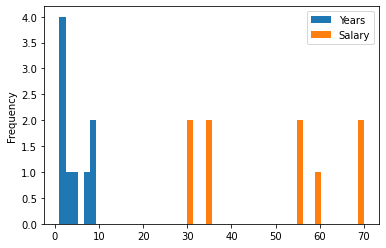

In [58]:
# your answer here
employee.plot.hist(bins=50)

#### What's the average salary in this company?

In [59]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [60]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [61]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [62]:
# your answer here
bajo = employee.loc[employee['Salary'] == 30]

In [63]:
bajo

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [64]:
# your answer here
david = employee.loc[employee['Name'] == 'David']

In [68]:
david.reset_index(inplace=True)
david

,level_0,index,Name,Department,Education,Gender,Title,Years,Salary
0,0,2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [69]:
# your answer here
david['Salary']

0    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [70]:
# your answer here
employee.loc[employee['Title']== 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [75]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [76]:
# your answer here- 2nd method
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [77]:
# your answer here
employee.loc[(employee['Title']== 'associate') & (employee['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [85]:
# your answer here
employee.Years.unique()

array([1, 2, 4, 3, 8, 7])

In [90]:
bins = [0, 1, 3, 5, 7, np.inf]
names = ['junior', 'middle', 'senior', 'manager', 'senior manager']

employee['catyears'] = pd.cut(employee['Years'], bins, labels=names)

In [91]:
employee.groupby(['catyears'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
catyears,,,,,,,,
junior,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
middle,4.0,42.5,14.433757,30.0,30.0,42.5,55.0,55.0
senior,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
manager,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0
senior manager,2.0,70.0,0.000000,70.0,70.0,70.0,70.0,70.0


####  What is the average Salary per title?

In [97]:
# your answer here
employee.groupby(['Title'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
VP,2.0,70.000000,0.000000,70.0,70.0,70.0,70.0,70.0
analyst,4.0,32.500000,2.886751,30.0,30.0,32.5,35.0,35.0
associate,3.0,56.666667,2.886751,55.0,55.0,55.0,57.5,60.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

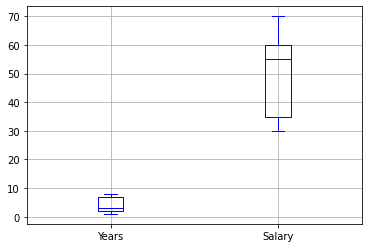

In [101]:
# draw boxplot here
employee.boxplot(color='b')

In [105]:
# print first quartile here
employee.describe().loc[['25%']]

,Years,Salary
25%,2.0,35.0


In [104]:
# print third quartile here
employee.describe().loc[['75%']]

,Years,Salary
75%,7.0,60.0


#### Is the mean salary per gender different?

In [128]:
# your answer here
Gender = employee.groupby(['Gender'])['Salary'].describe()[['mean']].T
Gender

Gender,F,M
mean,47.5,50.0


In [129]:
Gender['F']==Gender['M']

mean    False
dtype: bool

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [139]:
# your answer here
datos = employee.groupby(['Department']).agg({'Years':['mean','min','max'], 'Salary':['mean','min','max']})

In [140]:
datos

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [147]:
# your answer here
maxi_year = datos['Years']['max']-datos['Years']['min']

In [148]:
maxi_sal = datos['Salary']['max']-datos['Salary']['min']

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [150]:
# your answer here
orders = pd.read_csv('Orders.csv')

In [208]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [152]:
# your answer here
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 141.2 MB


In [154]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [157]:
# your answer here
orders['UnitPrice'].describe().loc['mean']

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [164]:
# your answer here
orders.groupby(['UnitPrice']).agg({'UnitPrice':['min','max']}).head()

UnitPrice       
                min    max
UnitPrice                 
0.000         0.000  0.000
0.001         0.001  0.001
0.040         0.040  0.040
0.060         0.060  0.060
0.070         0.070  0.070

In [172]:
# your answer here
orders[['UnitPrice']].describe()

,UnitPrice
count,397924.000000
mean,3.116174
std,22.096788
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


#### Select all the customers we have in Spain

In [195]:
# your answer here
Spain=orders[(orders.Country=='Spain')].head()

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [181]:
# your answer here
orders[orders.Country=='Spain']['Country'].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [183]:
# your answer here
orders[orders.Quantity > 50].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [184]:
# your answer here
orders[(orders.Quantity > 50) & (orders.Country=='Spain')].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [209]:
# your answer here
orders[(orders.UnitPrice==0.0)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [190]:
# your answer here
orders[(orders.Description.str.contains('lunch bag'))].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [194]:
# your answer here
orders[(orders.Description.str.contains('lunch bag')) & (orders.year==2011)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:ylabel='Frequency'>

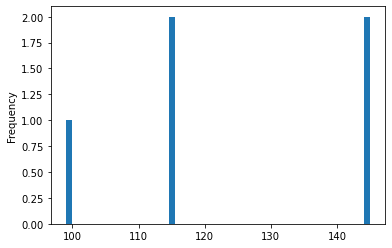

In [197]:
# your answer here
Spain.amount_spent.plot.hist(bins=50)

#### Select all orders made in the month of August

In [206]:
# your answer here
august = orders[orders.month==8]
august.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [207]:
# your answer here
august.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [210]:
# your answer here
orders.groupby(['Country']).agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [229]:
# your answer here
orders['UnitPrice'].max()

8142.75

In [230]:
orders.loc[orders['UnitPrice']==8142.75]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [240]:
# your answer here
orders.groupby(['year'])['UnitPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,26160.0,3.132095,5.220290,0.0,1.25,2.10,3.75,295.00
2011,371764.0,3.115054,22.819041,0.0,1.25,1.85,3.75,8142.75
